In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from scipy.io import arff



In [10]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
II. Data Understanding</p><br>

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Load a Dataframe:</p><br>

In [27]:
# Charger le fichier ARFF
data_train, meta_train = arff.loadarff('KDDTrain+.arff')
data_test, meta_test = arff.loadarff('KDDTest+.arff')

# Convertir les données en DataFrame
train = pd.DataFrame(data_train)
test = pd.DataFrame(data_test)
print(train)
print(test)



        duration protocol_type      service   flag  src_bytes  dst_bytes  \
0            0.0        b'tcp'  b'ftp_data'  b'SF'      491.0        0.0   
1            0.0        b'udp'     b'other'  b'SF'      146.0        0.0   
2            0.0        b'tcp'   b'private'  b'S0'        0.0        0.0   
3            0.0        b'tcp'      b'http'  b'SF'      232.0     8153.0   
4            0.0        b'tcp'      b'http'  b'SF'      199.0      420.0   
...          ...           ...          ...    ...        ...        ...   
125968       0.0        b'tcp'   b'private'  b'S0'        0.0        0.0   
125969       8.0        b'udp'   b'private'  b'SF'      105.0      145.0   
125970       0.0        b'tcp'      b'smtp'  b'SF'     2231.0      384.0   
125971       0.0        b'tcp'    b'klogin'  b'S0'        0.0        0.0   
125972       0.0        b'tcp'  b'ftp_data'  b'SF'      151.0        0.0   

        land  wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0       b'0'     

<p style="font-family: Arial; font-size:1.5em;color:blue; font-style:bold"><br>
1.Informations sur dataset</p><br>

In [23]:
train.head(8)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'
5,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,19.0,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly'
6,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,9.0,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
7,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'


In [24]:
test.head(8)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,b'anomaly'
5,0.0,b'tcp',b'http',b'SF',267.0,14515.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,b'normal'
6,0.0,b'tcp',b'smtp',b'SF',1022.0,387.0,b'0',0.0,0.0,0.0,...,28.0,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,b'normal'
7,0.0,b'tcp',b'telnet',b'SF',129.0,174.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,b'anomaly'


In [28]:
print("Taille initial du dataset train :",train.shape)
print("Taille initial du dataset train :",test.shape)

Taille initial du dataset train : (125973, 42)
Taille initial du dataset train : (22544, 42)


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  float64
 5   dst_bytes                    22544 non-null  float64
 6   land                         22544 non-null  object 
 7   wrong_fragment               22544 non-null  float64
 8   urgent                       22544 non-null  float64
 9   hot                          22544 non-null  float64
 10  num_failed_logins            22544 non-null  float64
 11  logged_in                    22544 non-null  object 
 12  num_compromised              22544 non-null  float64
 13  root_shell      

In [31]:
train.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
test.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.008428,0.000710,0.105394,0.021647,0.119899,0.002440,0.000266,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.142599,0.036473,0.928428,0.150328,7.269597,0.049334,0.021060,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,3.000000,3.000000,101.000000,4.000000,796.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# affichage des valeurs pour chaque colonne
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")

Valeurs uniques pour la colonne duration: [    0.  5607.   507. ...  5430. 11680.   679.]
Valeurs uniques pour la colonne protocol_type: [b'tcp' b'udp' b'icmp']
Valeurs uniques pour la colonne service: [b'ftp_data' b'other' b'private' b'http' b'remote_job' b'name'
 b'netbios_ns' b'eco_i' b'mtp' b'telnet' b'finger' b'domain_u' b'supdup'
 b'uucp_path' b'Z39_50' b'smtp' b'csnet_ns' b'uucp' b'netbios_dgm'
 b'urp_i' b'auth' b'domain' b'ftp' b'bgp' b'ldap' b'ecr_i' b'gopher'
 b'vmnet' b'systat' b'http_443' b'efs' b'whois' b'imap4' b'iso_tsap'
 b'echo' b'klogin' b'link' b'sunrpc' b'login' b'kshell' b'sql_net' b'time'
 b'hostnames' b'exec' b'ntp_u' b'discard' b'nntp' b'courier' b'ctf' b'ssh'
 b'daytime' b'shell' b'netstat' b'pop_3' b'nnsp' b'IRC' b'pop_2'
 b'printer' b'tim_i' b'pm_dump' b'red_i' b'netbios_ssn' b'rje' b'X11'
 b'urh_i' b'http_8001' b'aol' b'http_2784' b'tftp_u' b'harvest']
Valeurs uniques pour la colonne flag: [b'SF' b'S0' b'REJ' b'RSTR' b'SH' b'RSTO' b'S1' b'RSTOS0' b'S3' b'S2'

<p style="font-family: Arial; font-size:1.75em;color:green; font-style:bold"><br>
 Vérification de l'équilibrage du notre dataset:</p><br>

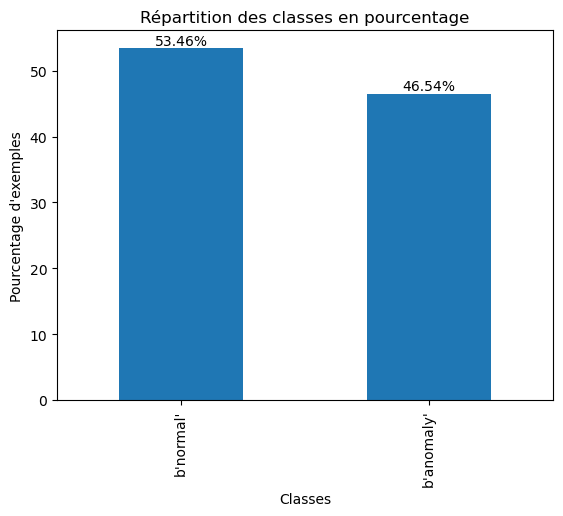

In [36]:
class_counts = train['class'].value_counts()
class_percentages = (class_counts / len(train)) * 100
ax = class_percentages.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Pourcentage d\'exemples')
plt.title('Répartition des classes en pourcentage')
for i, v in enumerate(class_percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()


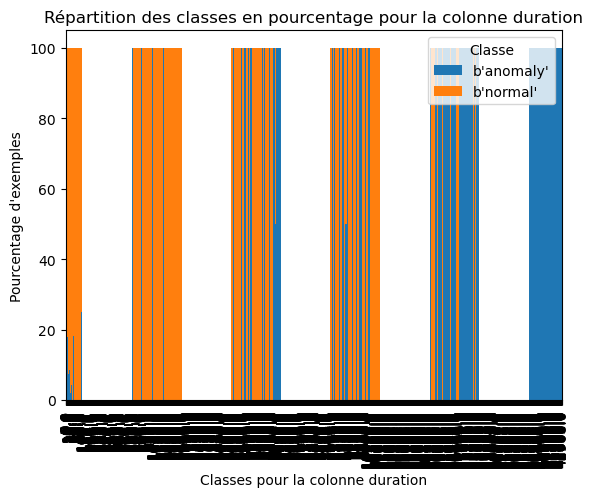

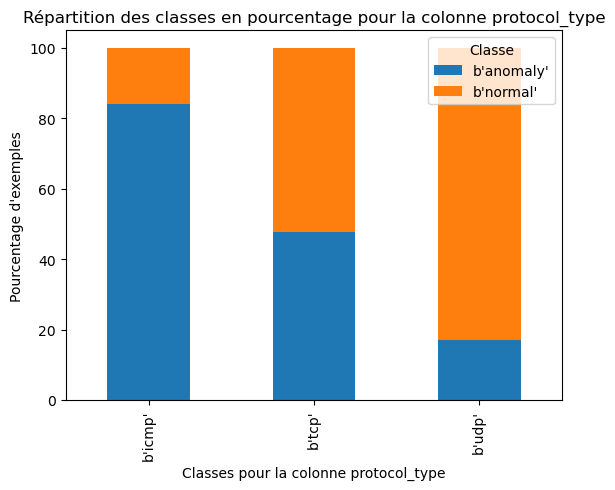

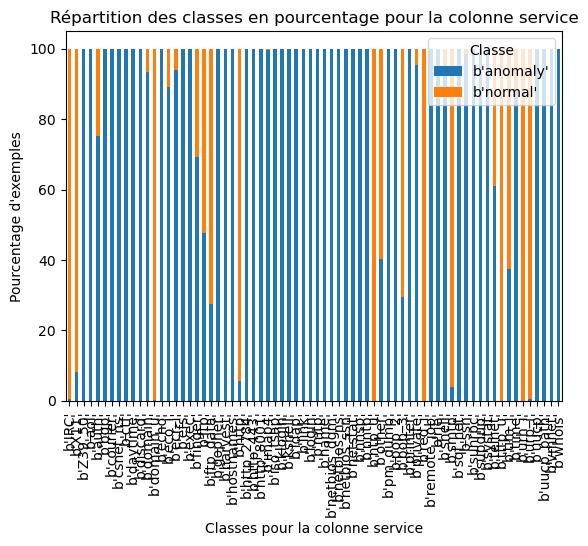

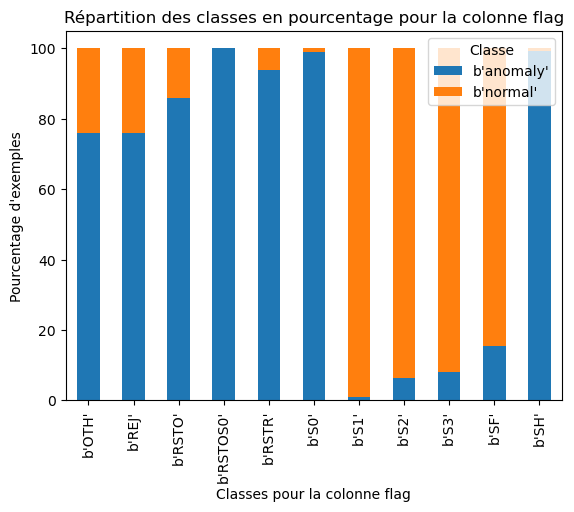

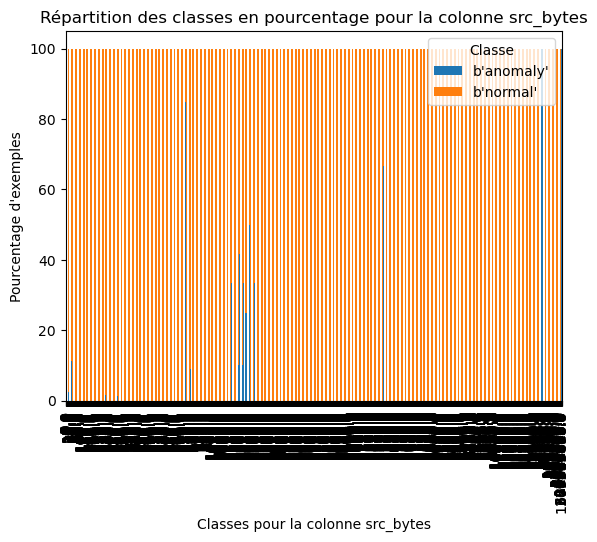

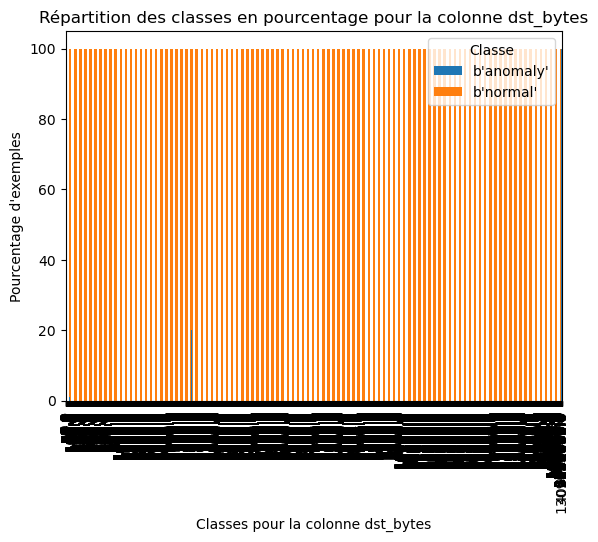

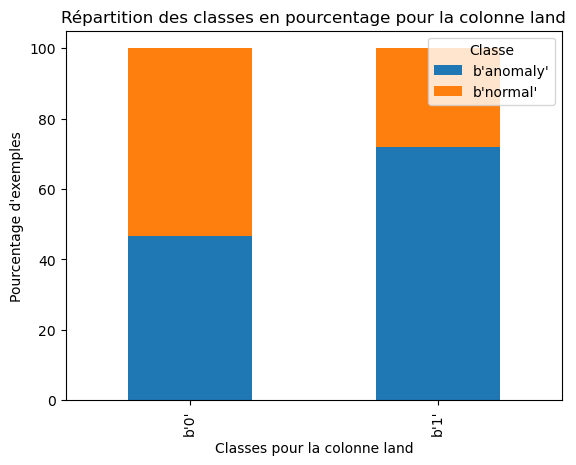

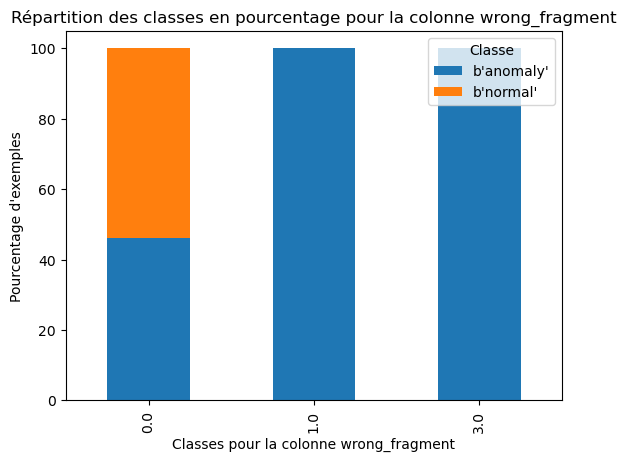

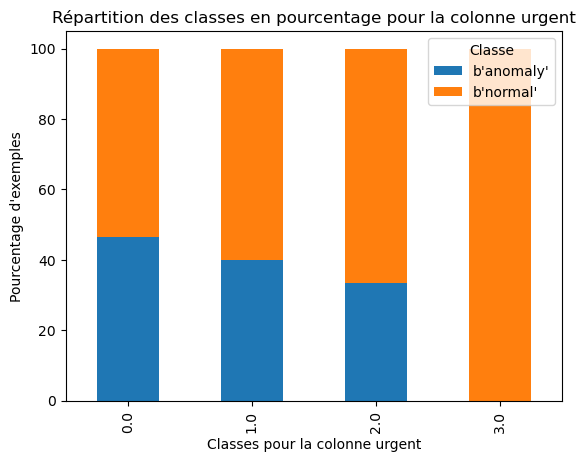

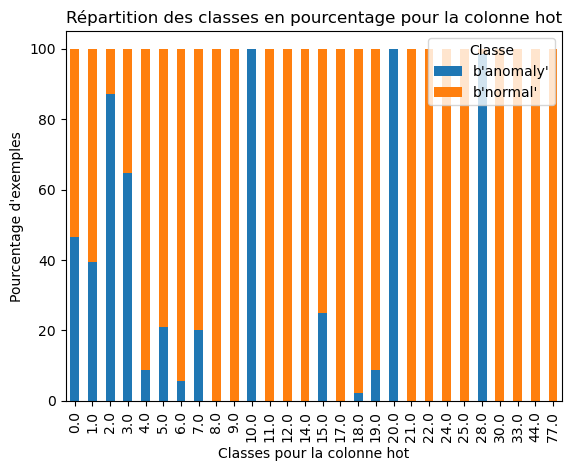

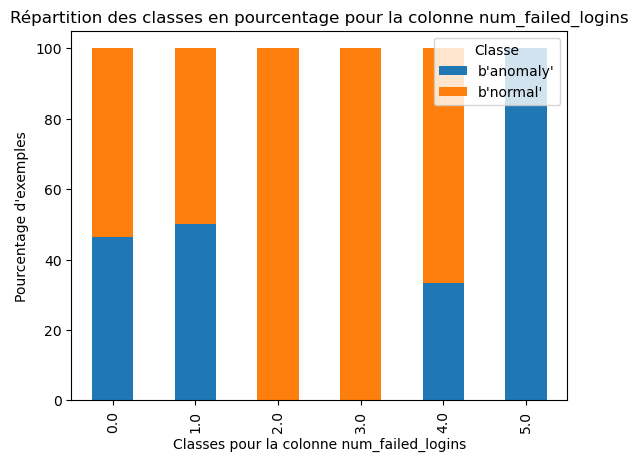

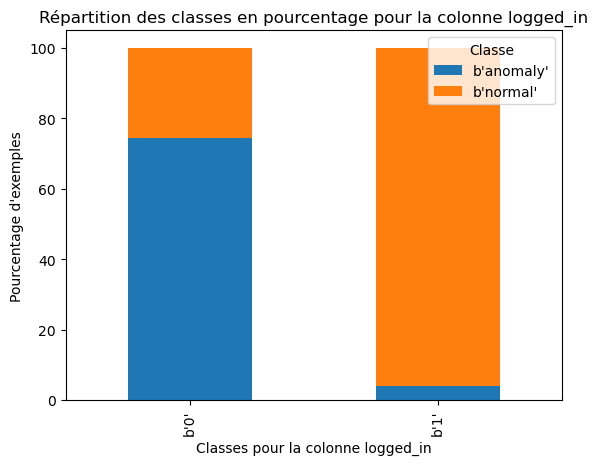

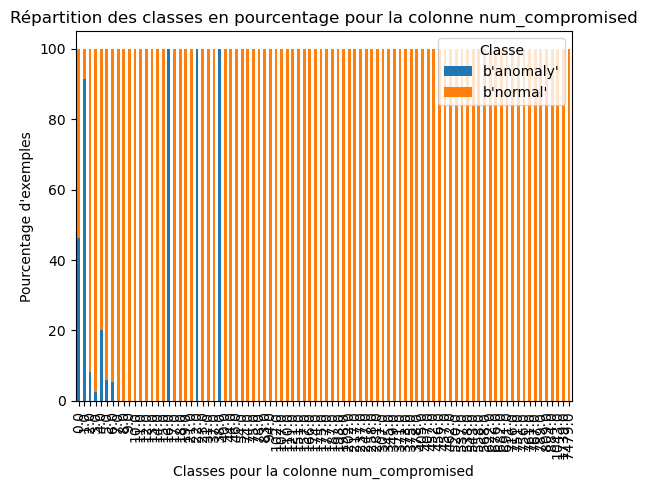

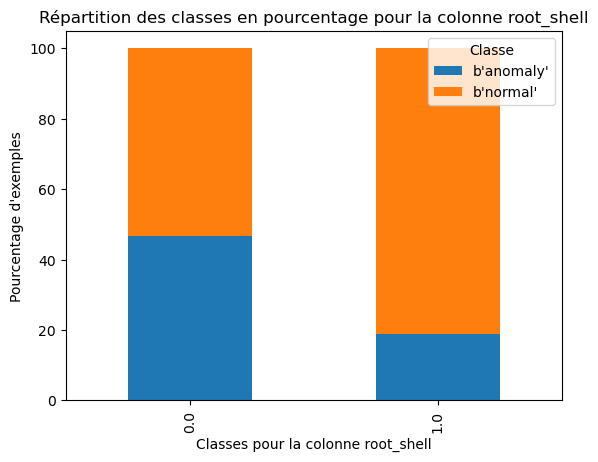

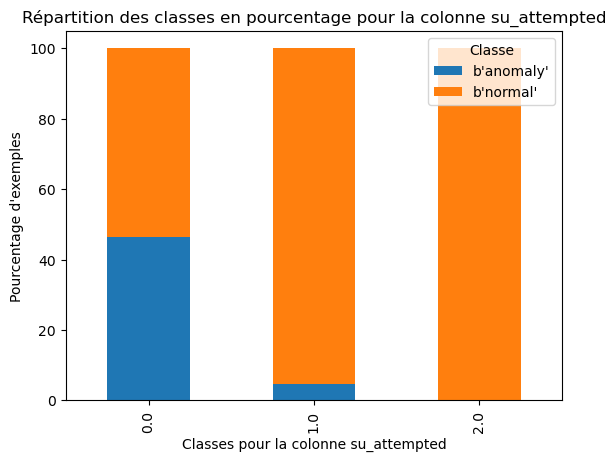

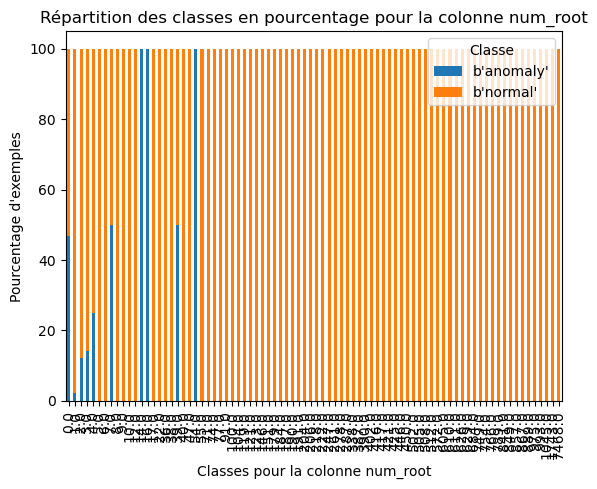

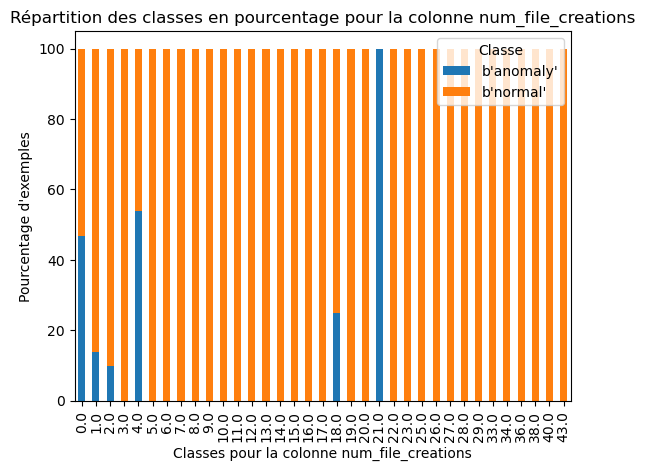

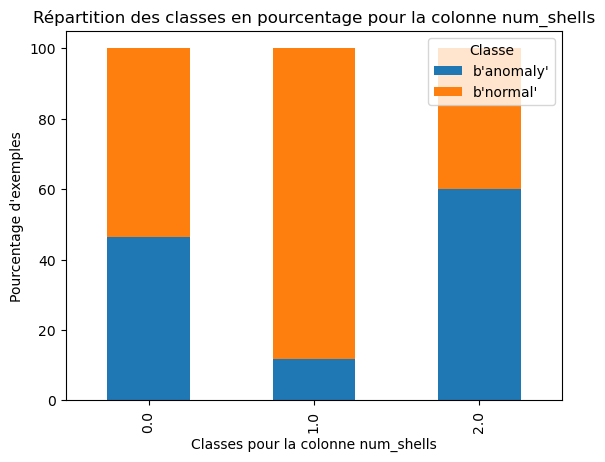

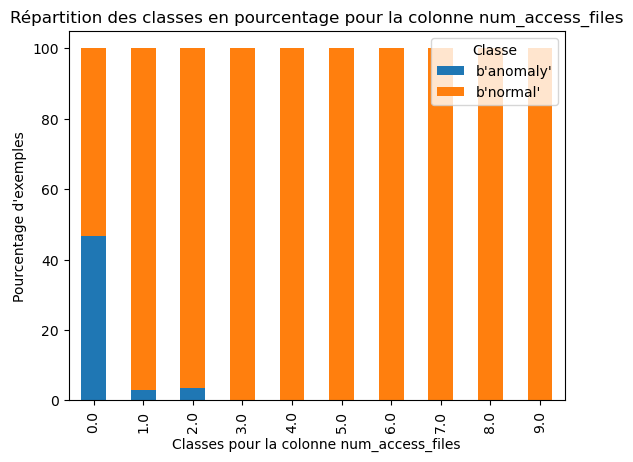

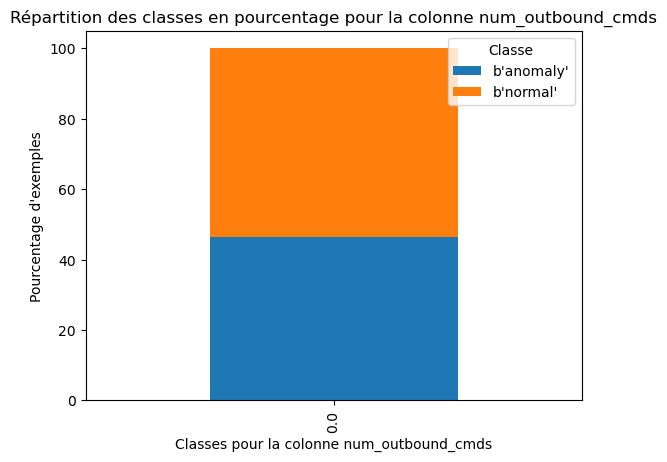

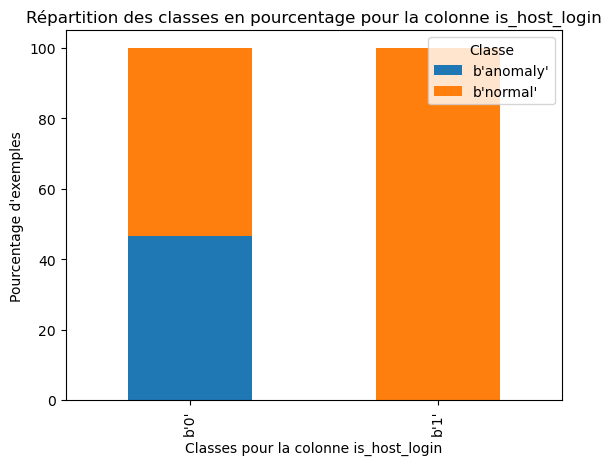

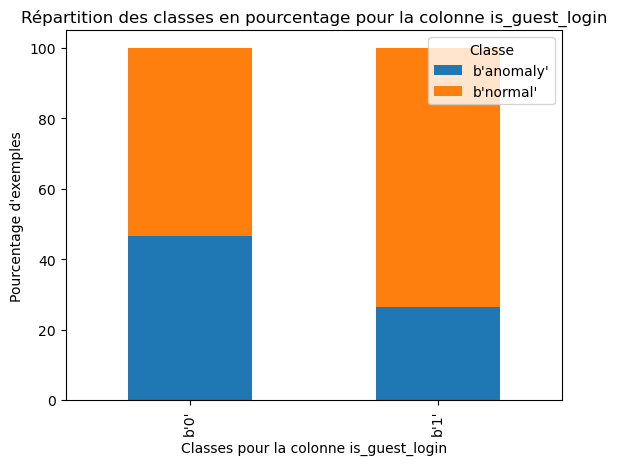

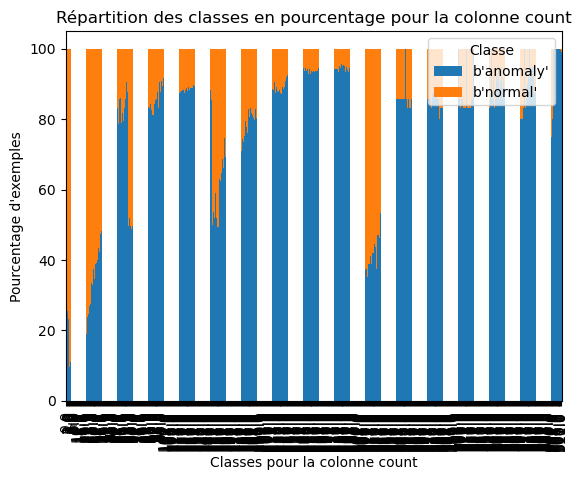

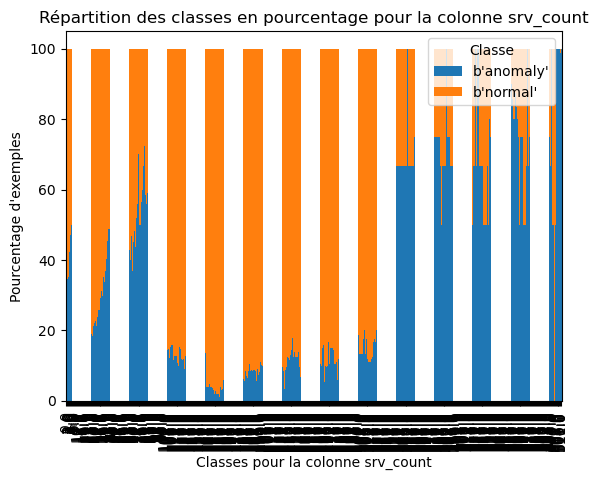

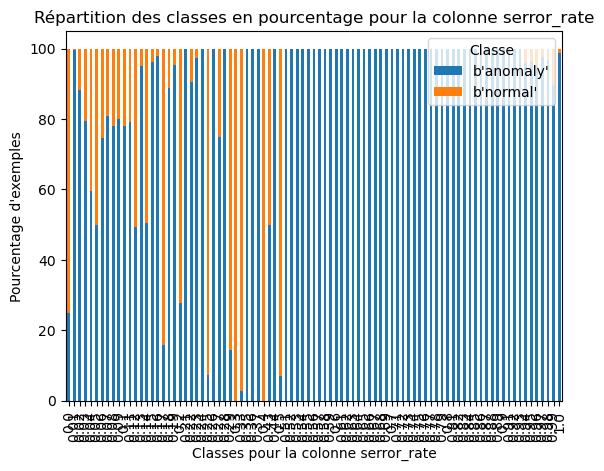

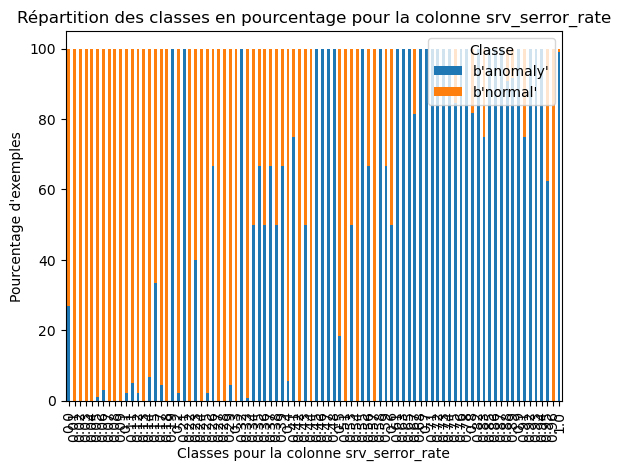

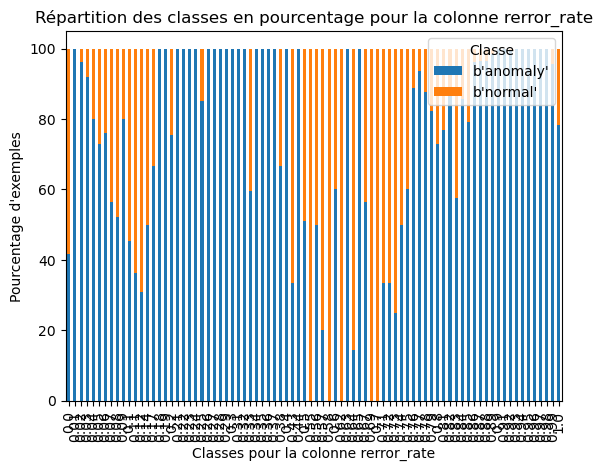

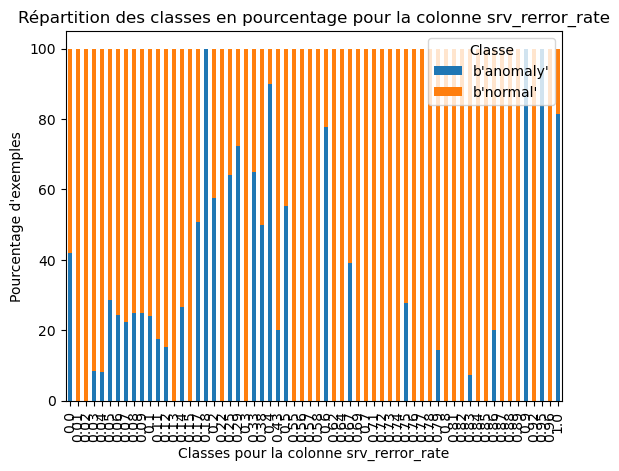

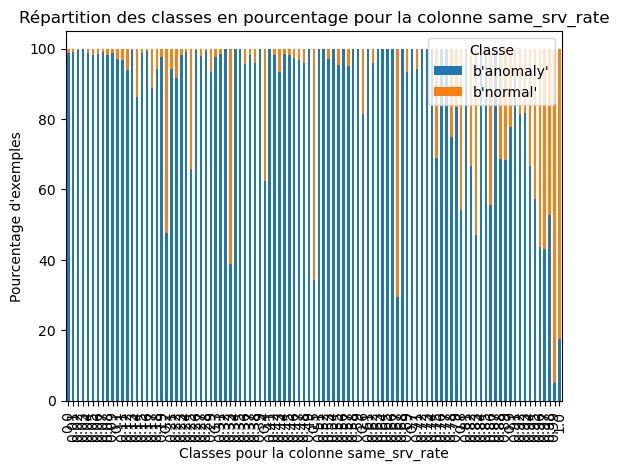

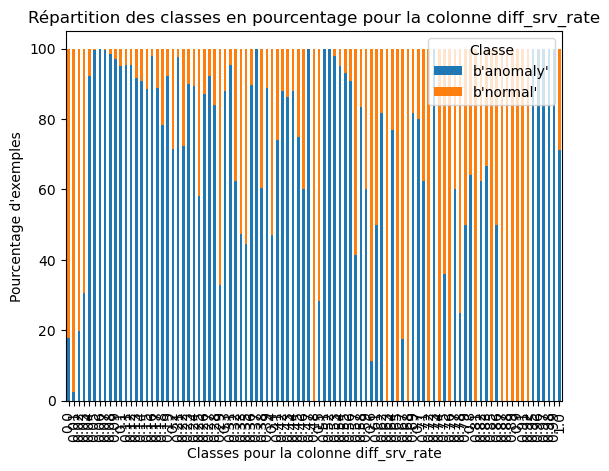

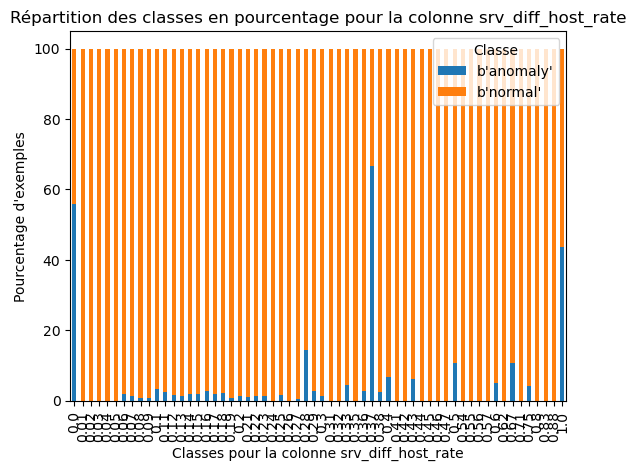

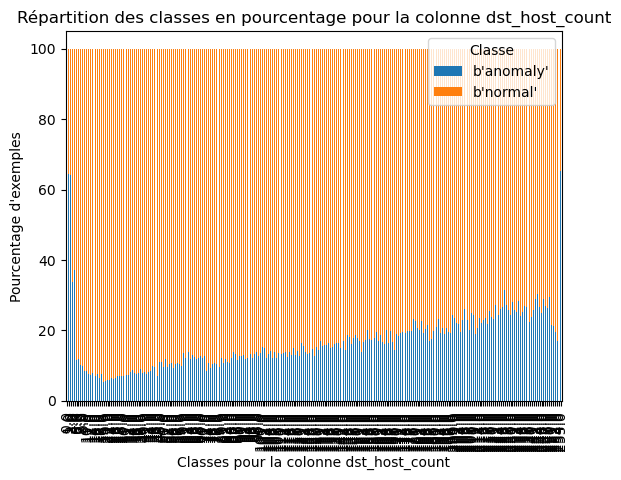

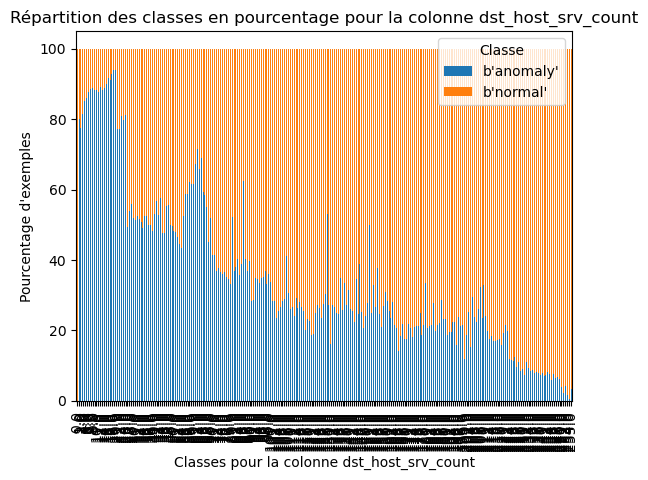

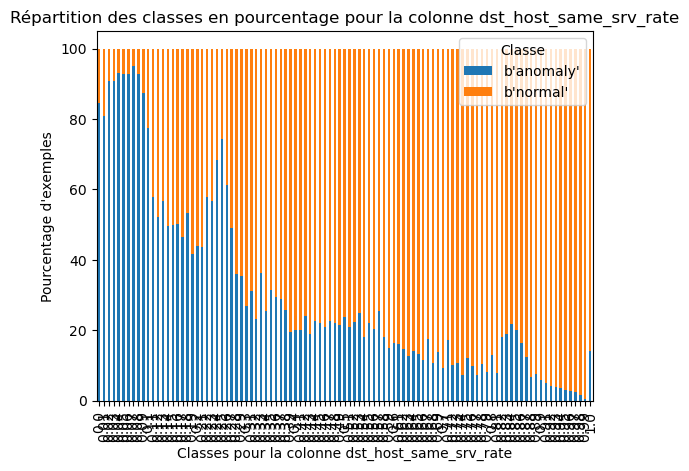

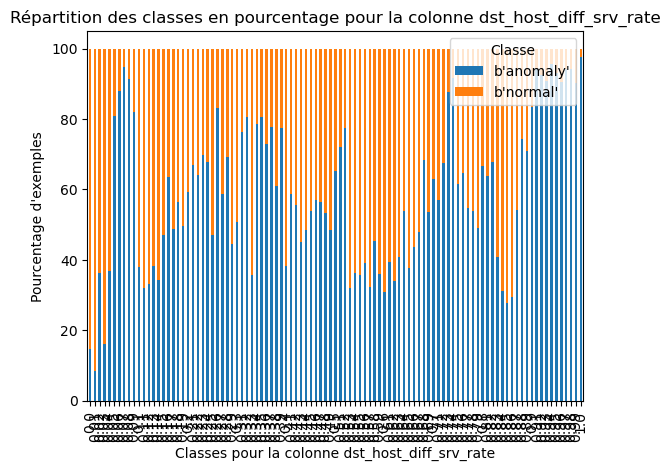

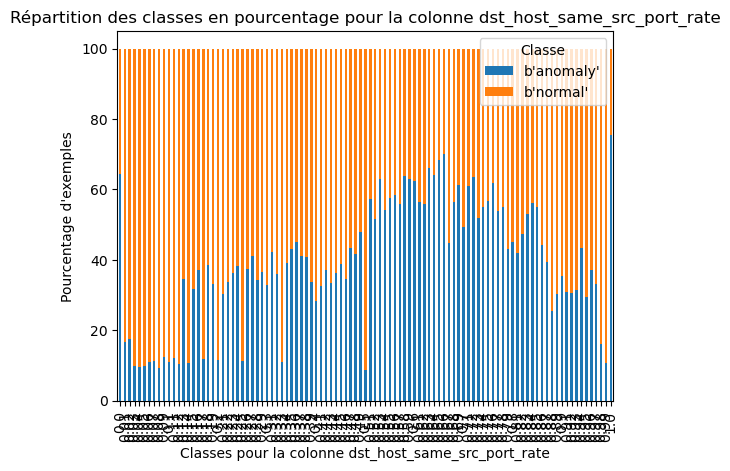

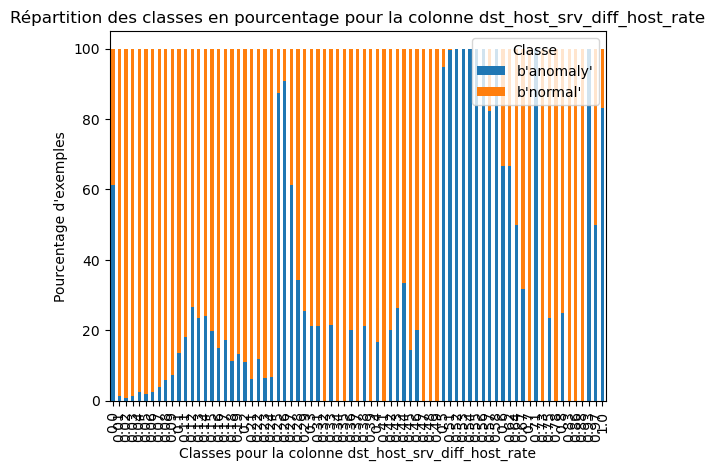

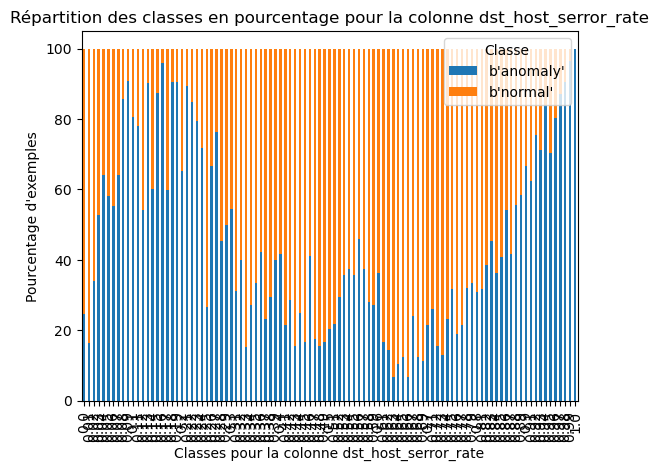

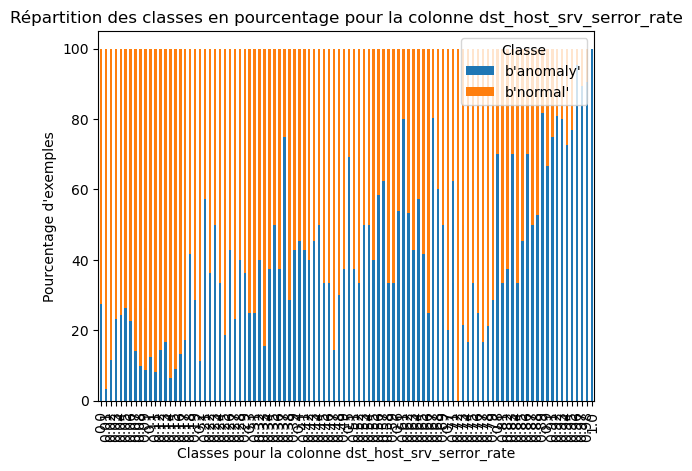

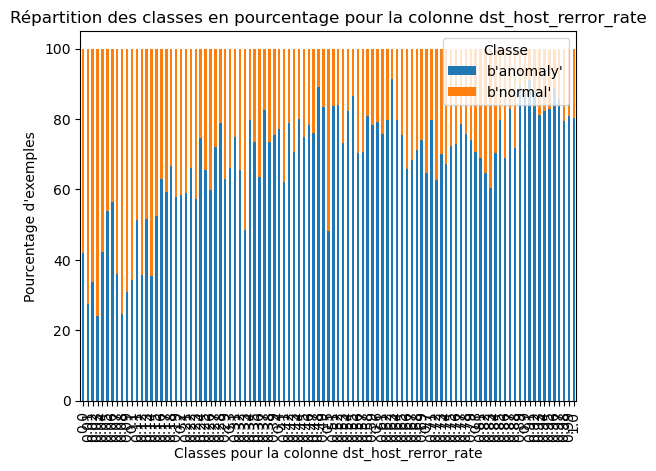

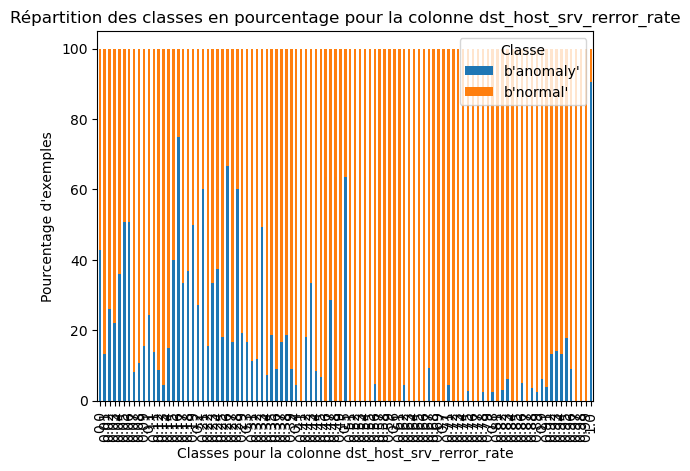

In [37]:
# Afficher la répartition des classes en pourcentage pour chaque colonne
for column in train.columns[:-1]:  # Exclure la colonne 'class'
    class_counts = train.groupby([column, 'class']).size().unstack(fill_value=0)
    class_percentages = (class_counts.div(class_counts.sum(axis=1), axis=0) * 100).round(2)
    
    ax = class_percentages.plot(kind='bar', stacked=True)
    plt.xlabel(f'Classes pour la colonne {column}')
    plt.ylabel('Pourcentage d\'exemples')
    plt.title(f'Répartition des classes en pourcentage pour la colonne {column}')
    plt.legend(title='Classe', loc='upper right')
    plt.show()

In [38]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [39]:
# Vérifier les lignes dupliquées dans le DataFrame
duplicates = train[train.duplicated()]

# Afficher le nombre total de lignes dupliquées
print(f"Nombre total de lignes dupliquées : {len(duplicates)}")


Nombre total de lignes dupliquées : 9


In [40]:
# Supprimer les lignes dupliquées du DataFrame
train = train.drop_duplicates()

# Afficher le nombre total de lignes après suppression des duplicatas
print(f"Nombre total de lignes après suppression des duplicatas : {len(train)}")


Nombre total de lignes après suppression des duplicatas : 125964


In [41]:
# Vérifier les lignes dupliquées dans le DataFrame
duplicates = train[train.duplicated()]

# Afficher le nombre total de lignes dupliquées
print(f"Nombre total de lignes dupliquées : {len(duplicates)}")


Nombre total de lignes dupliquées : 0


In [42]:
# Nombre de valeurs uniques dans chaque colonne
print(train.nunique())

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [45]:
def detect_outliers_iqr(data, threshold=1.5):
    outliers_info = {}

    for column in data.columns:
        if data[column].dtype in [int, float]:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            
            if not column_outliers.empty:
                num_outliers = len(column_outliers)
                percent_outliers = (num_outliers / len(data)) * 100
                outliers_info[column] = {"outliers_df": column_outliers, "num_outliers": num_outliers, "percent_outliers": percent_outliers}

    return outliers_info

outliers_info = detect_outliers_iqr(train)

# Afficher les colonnes avec des valeurs aberrantes, le nombre de valeurs aberrantes, et le pourcentage de valeurs aberrantes
for column, info in outliers_info.items():
    print(f"Outliers in column '{column}': {info['num_outliers']} outliers ({info['percent_outliers']:.2f}%)")
    #print(info['outliers_df'].head())
    #print("\n")


Outliers in column 'duration': 10018 outliers (7.95%)
Outliers in column 'src_bytes': 13840 outliers (10.99%)
Outliers in column 'dst_bytes': 23579 outliers (18.72%)
Outliers in column 'wrong_fragment': 1090 outliers (0.87%)
Outliers in column 'urgent': 9 outliers (0.01%)
Outliers in column 'hot': 2671 outliers (2.12%)
Outliers in column 'num_failed_logins': 122 outliers (0.10%)
Outliers in column 'num_compromised': 1286 outliers (1.02%)
Outliers in column 'root_shell': 169 outliers (0.13%)
Outliers in column 'su_attempted': 80 outliers (0.06%)
Outliers in column 'num_root': 649 outliers (0.52%)
Outliers in column 'num_file_creations': 287 outliers (0.23%)
Outliers in column 'num_shells': 47 outliers (0.04%)
Outliers in column 'num_access_files': 371 outliers (0.29%)
Outliers in column 'count': 3157 outliers (2.51%)
Outliers in column 'srv_count': 12053 outliers (9.57%)
Outliers in column 'rerror_rate': 16190 outliers (12.85%)
Outliers in column 'srv_rerror_rate': 16206 outliers (12.87

In [49]:
train['class'].unique()

array([b'normal', b'anomaly'], dtype=object)